In [19]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
from proj1_helpers import *
from implementations import *

## Load the training data into feature matrix, class labels, and event ids

In [21]:
DATA_TRAIN_PATH = '../data/train.csv' # TODO: download train data and supply path here 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

## Preprocessing the data

Lets have a first see on the dataset. We observe that there is missing data all over tX. So we look at how many values are missing for each column, which corresponds to probilities to have a missing value in a column. 

A possible solution could be to remove columns with too many missing values, but these missing values may influence the final prediction. We therefore computed the probability of y given x=-999 and we saw in the results that if the proportion of -999 was very big, the conditional probability of y to be -1 is closer to 1 than the conditional probability of y to be 1 ! 

In [22]:
for i in range(tX.shape[1]):
    indexes = tX.T[i]<-900
    indexes0 = np.logical_and(indexes,y<=0)
    indexes1 = np.logical_and(indexes,y>0)
    tX_nine= tX[indexes]
    tX_nine0 = tX[indexes0]
    tX_nine1 = tX[indexes1]
    count_of_mins = np.count_nonzero(tX.T[i] < -900)
    if(count_of_mins > 0):
        print("Column", i, "has", count_of_mins /tX.shape[0] * 100, "% of missing values and we have:")
        print("P(y=1|x=-999) =", (tX_nine1.shape[0]/tX_nine.shape[0]*100), "% ")
        print("P(y=-1|x=-999)=", (tX_nine0.shape[0]/tX_nine.shape[0] *100), "% \n")


Column 0 has 15.245600000000001 % of missing values and we have:
P(y=1|x=-999) = 7.438211680747233 % 
P(y=-1|x=-999)= 92.56178831925277 % 

Column 4 has 70.9828 % of missing values and we have:
P(y=1|x=-999) = 29.980220560473803 % 
P(y=-1|x=-999)= 70.0197794395262 % 

Column 5 has 70.9828 % of missing values and we have:
P(y=1|x=-999) = 29.980220560473803 % 
P(y=-1|x=-999)= 70.0197794395262 % 

Column 6 has 70.9828 % of missing values and we have:
P(y=1|x=-999) = 29.980220560473803 % 
P(y=-1|x=-999)= 70.0197794395262 % 

Column 12 has 70.9828 % of missing values and we have:
P(y=1|x=-999) = 29.980220560473803 % 
P(y=-1|x=-999)= 70.0197794395262 % 

Column 23 has 39.9652 % of missing values and we have:
P(y=1|x=-999) = 25.514197351695977 % 
P(y=-1|x=-999)= 74.48580264830402 % 

Column 24 has 39.9652 % of missing values and we have:
P(y=1|x=-999) = 25.514197351695977 % 
P(y=-1|x=-999)= 74.48580264830402 % 

Column 25 has 39.9652 % of missing values and we have:
P(y=1|x=-999) = 25.5141973

We see column #22 contains values in [0,1,2,3]. Depending on this value, some columns will contain the missing value, because they can't be computed. For this reason, we want the columns to keep depending on the value of column #22 !

In [23]:
train_type0 = tX[tX[:, 22] == 0]

train_type1 = tX[tX[:, 22] == 1]
train_type2 = tX[tX[:, 22] == 2]
train_type3 = tX[tX[:, 22] == 3]
train_type23 = np.append(train_type2, train_type3, axis=0)
print(train_type0.shape)
print(train_type1.shape)
print(train_type23.shape)

columns_to_keep0 = np.count_nonzero(train_type0[0] == -999, axis=0)
columns_to_keep1 = np.count_nonzero(train_type1[0] == -999, axis=0)
columns_to_keep23 = np.count_nonzero(train_type23[0] == -999, axis=0)

print("Columns #22 contains 0, a row contains", columns_to_keep0, "columns with missing value.")
print("Columns #22 contains 1, a row contains", columns_to_keep1, "columns with missing value.")
print("Columns #22 contains 2 or 3, a row contains", columns_to_keep23, "columns with missing value.")

(99913, 30)
(77544, 30)
(72543, 30)
Columns #22 contains 0, a row contains 10 columns with missing value.
Columns #22 contains 1, a row contains 7 columns with missing value.
Columns #22 contains 2 or 3, a row contains 0 columns with missing value.


It can be seen that column #0 has missing values that do not depend on column #22.

In [24]:
def preprocess_data(y, tX0):
    MISSING_DATA = -999
    MISSING_DATA2 = 0
    tX1 = np.delete(tX0, 22, axis=1)
    
    # replace missing data for all columns
    x=tX1
    print("col n°1 first 6 values, before preprocess:", x[:, 0][:6])
    replacement_values_by_col = np.ma.array(x, mask=[x==MISSING_DATA]).mean(axis=0)
    replacement_values = np.tile(replacement_values_by_col, (len(x), 1))
    x2= x.copy()
    x2[x == MISSING_DATA] = replacement_values[x == MISSING_DATA]
    # replace missing data for last column
    last = tX[:,-1]
    rvbc = np.ma.array(last, mask=[last==MISSING_DATA2]).mean(axis=0)
    rv = np.tile(rvbc, (len(last), 1))
    last2 = last.copy()
    last2[last == MISSING_DATA2] = rv[last== MISSING_DATA2].flatten()
    x2[:, -1] = last2
    
    
    print("col n°1 first 6 values, after preprocess: ", x2[:, 0][:6])
    standardized_x, _, _ = standardize(x2)
    print("col n°2 first 6 values, after standardization: ", standardized_x[:, 0][:6], '\n')
    
    return y, standardized_x

y_train, tx_train = preprocess_data(y, tX)

col n°1 first 6 values, before preprocess: [ 138.47   160.937 -999.     143.905  175.864   89.744]
col n°1 first 6 values, after preprocess:  [138.47       160.937      121.85852836 143.905      175.864
  89.744     ]
col n°2 first 6 values, after standardization:  [ 3.14910656e-01  7.40827026e-01 -1.00190288e-12  4.17944237e-01
  1.02380444e+00 -6.08808624e-01] 



In [14]:
def preprocess_data2(y, tX0):
    MISSING_DATA = -999
    PJN = tX[:,22]

    r_PNJ_0 = np.argwhere(PJN==0).flatten()
    r_PNJ_1 = np.argwhere(PJN==1).flatten()
    r_PNJ_23 = np.append(np.argwhere(PJN==2).flatten(), np.argwhere(PJN==3).flatten())
    
            
    x0 = tX0[r_PNJ_0]
    columns_to_del = np.argwhere(x0[0]==MISSING_DATA).flatten()
    x00 = np.delete(x0, columns_to_del, axis=1)
    x_0 = x00[:,:-2] #delete last column and PRI_jet_num column
    x1 = tX0[r_PNJ_1]
    columns_to_del = np.argwhere(x1[0]==MISSING_DATA).flatten()
    x11 = np.delete(x1, columns_to_del, axis=1)
    x_1 = np.delete(x11, -5, axis=1) #delete PRI_jet_num column
    x23 = tX0[r_PNJ_23]
    x_23 = np.delete(x23, 22, axis=1)
 
    
    # replace missing data for first column
    replacement_values_by_col = np.ma.array(x_0, mask=[x_0==MISSING_DATA]).mean(axis=0)
    replacement_values = np.tile(replacement_values_by_col, (len(x_0), 1))
    x0= x_0.copy()
    x0[x_0 == MISSING_DATA] = replacement_values[x_0 == MISSING_DATA]
    replacement_values_by_col = np.ma.array(x_1, mask=[x_1==MISSING_DATA]).mean(axis=0)
    replacement_values = np.tile(replacement_values_by_col, (len(x_1), 1))
    x1= x_1.copy()
    x1[x_1 == MISSING_DATA] = replacement_values[x_1 == MISSING_DATA]
    replacement_values_by_col = np.ma.array(x_23, mask=[x_23==MISSING_DATA]).mean(axis=0)
    replacement_values = np.tile(replacement_values_by_col, (len(x_23), 1))
    x23= x_23.copy()
    x23[x_23 == MISSING_DATA] = replacement_values[x_23 == MISSING_DATA]

    
    standardized_x0, _, _ = standardize(x0)
    standardized_x1, _, _ = standardize(x1)
    standardized_x23, _, _ = standardize(x23)    
    
    y_x0  = (y[r_PNJ_0], standardized_x0)
    y_x1  = (y[r_PNJ_1], standardized_x1)
    y_x23 = (y[r_PNJ_23], standardized_x23)
    return y_x0, y_x1, y_x23

y_x0, y_x1, y_x23 = preprocess_data2(y, tX)

In [15]:
y_train0, tx_train0 = y_x0
print(y_train0.shape, tx_train0.shape)
y_train1, tx_train1 = y_x1
print(y_train1.shape, tx_train1.shape)
y_train23, tx_train23 = y_x23
print(y_train23.shape, tx_train23.shape)

(99913,) (99913, 18)
(77544,) (77544, 22)
(72543,) (72543, 29)


## Least Squares 
***Test for least squares method***

In [25]:
x_tr, x_te, y_tr, y_te = split_data(tx_train23, y_train23, 0.95)
px_tr = build_poly(x_tr, 1)
px_te = build_poly(x_te, 1)
print(y_tr.shape)
print(px_tr.shape)
loss_LS, w_LS = least_squares(y_tr, px_tr)

y_validation_tr = predict_labels(w_LS, px_tr)
accuracy_tr = sum(y_validation_tr == y_tr)/len(y_tr)
print('Accuracy for LS (S train):', accuracy_tr)

y_validation_te = predict_labels(w_LS, px_te)
accuracy_te = sum(y_validation_te == y_te)/len(y_te)
print('Accuracy for LS (S test):', accuracy_te)

NameError: name 'split_data' is not defined

***Best degree choice with least squares method using build poly***

In [377]:
def find_best_degree_LS(x_tr, x_te, y_tr, y_te, degrees):
    accuracy = []
    for deg in degrees:
        print('Deg:', deg, end = '     ')
        px_tr = build_poly(x_tr, deg)
        px_te = build_poly(x_te, deg)
        
        loss, w = least_squares(y_tr, px_tr)
        
        y_validation_te = predict_labels(w, px_te)
        accuracy_te = sum(y_validation_te == y_te)/len(y_te)
        print('Accuracy for LS (S test):', accuracy_te)
        accuracy.append(accuracy_te)
            
    index = np.nanargmax(accuracy)
    best_deg = degrees[index]
    return best_deg

best_deg = find_best_degree_LS(x_tr, x_te, y_tr, y_te, range(6,15))
print('\nThe best degree for least squares is: ', best_deg)

Deg: 6     (175, 175) (175,)
Accuracy for LS (S test): 0.8023704520396913
Deg: 7     (204, 204) (204,)
Accuracy for LS (S test): 0.8106394707828004
Deg: 8     (233, 233) (233,)
Accuracy for LS (S test): 0.8211135611907387
Deg: 9     (262, 262) (262,)
Accuracy for LS (S test): 0.8252480705622933
Deg: 10     (291, 291) (291,)
Accuracy for LS (S test): 0.8257993384785005
Deg: 11     (320, 320) (320,)
Accuracy for LS (S test): 0.8235942668136714
Deg: 12     (349, 349) (349,)
Accuracy for LS (S test): 0.8252480705622933
Deg: 13     (378, 378) (378,)
Accuracy for LS (S test): 0.8244211686879823
Deg: 14     (407, 407) (407,)
Accuracy for LS (S test): 0.5350055126791621

The best degree for least squares is:  10


In [378]:
a = 0.850480384307446*tx_train0.shape[0]+0.798607529654461*tx_train1.shape[0] + 0.8257993384785005*tx_train23.shape[0]
a/tx_train.shape[0]




0.827228921312325

BEST = 0.8218 en faisant le bail moyen sur la derniere colone

***Best accuracy with least squares***

In [325]:
##### Least squares test using build-poly with best-degree
px_tr = build_poly(x_tr, best_deg)
px_te = build_poly(x_te, best_deg)
loss_LSp, w_LSp = least_squares(y_tr, px_tr)

y_validation_tr = predict_labels(w_LSp, px_tr)
accuracy_tr = sum(y_validation_tr == y_tr)/len(y_tr)
print('Accuracy for LS (S train):', accuracy_tr)

y_validation_te = predict_labels(w_LSp, px_te)
accuracy_te = sum(y_validation_te == y_te)/len(y_te)
print('Accuracy for LS (S test):', accuracy_te)

(349, 349) (349,)
Accuracy for LS (S train): 0.818858947368421
Accuracy for LS (S test): 0.818


## Gradient Descent

***Test for least squares with gradient descent***

In [296]:
gamma = 0.1
degree = 1
max_iters = 200

x_tr, x_te, y_tr, y_te = split_data(tx_train, y_train, 0.8)
px_tr = build_poly(x_tr, degree)
px_te = build_poly(x_te, degree)

initial_w = np.random.normal(0, 1, px_tr.shape[1])
loss_GD, w_GD = least_squares_GD(y_tr, px_tr, initial_w, max_iters, gamma)


y_validation_tr = predict_labels(w_GD, px_tr)
accuracy_tr = sum(y_validation_tr == y_tr)/len(y_tr)
print('Accuracy for GD (S train):', accuracy_tr)

y_validation_te = predict_labels(w_GD, px_te)
accuracy_te = sum(y_validation_te == y_te)/len(y_te)
print('Accuracy for GD (S test):', accuracy_te)

Accuracy for GD (S train): 0.740235
Accuracy for GD (S test): 0.73864


In [295]:
a = 0.8007806635640294*tx_train0.shape[0]+0.7047520794377459*tx_train1.shape[0] + 0.7232062857536702*tx_train23.shape[0]
a/tx_train.shape[0]






0.7484849890960877

***Best gamma choice with least squares method for linear regression***

In [9]:
np.random.seed(1)
def find_best_gamma_GD(x, y, deg, gammas):
    max_iters = 300
    accuracy = []
    print('Degree:', deg)

    for gam in gammas:
        x_tr, x_te, y_tr, y_te = split_data(x, y, 0.8)
        px_tr = build_poly(x_tr, deg)
        px_te = build_poly(x_te, deg)
        initial_w = np.random.normal(0, 1, px_tr.shape[1])
        
        loss_GD, w_GD = least_squares_GD(y_tr, px_tr, initial_w, max_iters, gam)
        
        y_validation_te = predict_labels(w_GD, px_te)
        accuracy_te = sum(y_validation_te == y_te)/len(y_te)
        print('Gamma: ', gam, '    accuracy for GD (S test):', accuracy_te)
        accuracy.append(accuracy_te)
            
    index = np.nanargmax(accuracy)
    best_lambda = gammas[index]
    return best_lambda, np.max(accuracy)

In [10]:
best_lambda, best_acc = find_best_gamma_GD(tx_train, y_train, 1, np.linspace(0.1, 0.5, 10))
print('\nThe best gamma for GD with degree 1 is: ', best_lambda, ' with an accuracy of: ', best_acc)

Degree: 1
Gamma:  0.1     accuracy for GD (S test): 0.72742
Gamma:  0.14444444444444446     accuracy for GD (S test): 0.73648
Gamma:  0.18888888888888888     accuracy for GD (S test): 0.74008
Gamma:  0.23333333333333334     accuracy for GD (S test): 0.74128
Gamma:  0.2777777777777778     accuracy for GD (S test): 0.74274
Gamma:  0.32222222222222224     accuracy for GD (S test): 0.74334
Gamma:  0.3666666666666667     accuracy for GD (S test): 0.74372
Gamma:  0.4111111111111111     accuracy for GD (S test): 0.3655
Gamma:  0.4555555555555556     accuracy for GD (S test): 0.3655
Gamma:  0.5     accuracy for GD (S test): 0.3655

The best gamma for GD with degree 1 is:  0.3666666666666667  with an accuracy of:  0.74372


We noticed that using a polynomial regression (using a degree greater than 2 with buildpoly) the GD had difficulties to converge.
We assumed that this was a difficult task for GD because the gamma used is the same for all degrees of our polynomial. However, a gradient is optimal for a fixed order of magnitude not for the entire polynomial. So we decided to keep a linear regression in the case of GD and SGD, obviously it is not optimal compared to the other functions.

## Stochastic Gradient Descent

***Test for least squares with stochastic gradient descent***

In [19]:
gamma = 0.01
degree = 1
max_iters = 200

x_tr, x_te, y_tr, y_te = split_data(tx_train, y_train, 0.8)
px_tr = build_poly(x_tr, degree)
px_te = build_poly(x_te, degree)

initial_w = np.zeros(px_tr.shape[1])
loss_SGD, w_SGD = least_squares_SGD(y_tr, px_tr, initial_w, max_iters, gamma)


y_validation_tr = predict_labels(w_SGD, px_tr)
accuracy_tr = sum(y_validation_tr == y_tr)/len(y_tr)
print('Accuracy for SGD (S train):', accuracy_tr)

y_validation_te = predict_labels(w_SGD, px_te)
accuracy_te = sum(y_validation_te == y_te)/len(y_te)
print('Accuracy for SGD (S test):', accuracy_te)

Accuracy for SGD (S train): 0.72228
Accuracy for SGD (S test): 0.71988


In [25]:
np.random.seed(1)
def find_best_gamma_SGD(x, y, deg, gammas):
    max_iters = 300
    accuracy = []
    print('Degree:', deg)

    for gam in gammas:
        x_tr, x_te, y_tr, y_te = split_data(x, y, 0.8)
        px_tr = build_poly(x_tr, deg)
        px_te = build_poly(x_te, deg)
        initial_w = np.zeros(px_tr.shape[1])
        
        loss_SGD, w_SGD = least_squares_SGD(y_tr, px_tr, initial_w, max_iters, gam)
        
        y_validation_te = predict_labels(w_SGD, px_te)
        accuracy_te = sum(y_validation_te == y_te)/len(y_te)
        print('Gamma: ', gam, '    accuracy for SGD (S test):', accuracy_te)
        accuracy.append(accuracy_te)
            
    index = np.nanargmax(accuracy)
    best_lambda = gammas[index]
    return best_lambda, np.max(accuracy)

In [27]:
best_lambda, best_acc = find_best_gamma_SGD(tx_train, y_train, 1, np.linspace(0.0005, 0.005, 10 ))
print('\nThe best gamma for SGD with degree 1 is: ', best_lambda, ' with an accuracy of: ', best_acc)

Degree: 1
Gamma:  0.0005     accuracy for SGD (S test): 0.70672
Gamma:  0.001     accuracy for SGD (S test): 0.71024
Gamma:  0.0015     accuracy for SGD (S test): 0.71104
Gamma:  0.002     accuracy for SGD (S test): 0.71186
Gamma:  0.0025     accuracy for SGD (S test): 0.71196
Gamma:  0.003     accuracy for SGD (S test): 0.71178
Gamma:  0.0035     accuracy for SGD (S test): 0.71174
Gamma:  0.004     accuracy for SGD (S test): 0.7109
Gamma:  0.0045000000000000005     accuracy for SGD (S test): 0.71054
Gamma:  0.005     accuracy for SGD (S test): 0.70992

The best gamma for GD with degree 1 is:  0.0025  with an accuracy of:  0.71196


## Ridge Regression

In [36]:
def find_best_param_ridge(y, x, lambdas):
    accuracy = []
    for lam in lambdas:
        print('\nLam:', lam)
        x_tr, x_te, y_tr, y_te = split_data(x, y, 0.8)
        px_tr = build_poly(x_tr, 7)
        px_te = build_poly(x_te, 7)
        loss, w = ridge_regression(y_tr, px_tr, lam)
    
        y_validation_te = predict_labels(w, px_te)
        #print(y_validation_te.shape, y_te.shape)
        accuracy_te = sum(y_validation_te == y_te)/len(y_te)
        print('Accuracy for Ridge (S test):', accuracy_te)
        accuracy.append(accuracy_te)
        
    index = np.nanargmax(accuracy)
    best_lam = lambdas[index]
        
    return best_lam

print(y_train.shape, tx_train.shape)
best_lambda = find_best_param_ridge(y_train, tx_train, [1e-4, 2e-4, 3e-4])

print(best_lambda)

(250000,) (250000, 28)

Lam: 0.0001
Accuracy for Ridge (S test): 0.80288

Lam: 0.0002
Accuracy for Ridge (S test): 0.80352

Lam: 0.0003
Accuracy for Ridge (S test): 0.79652
0.0002


In [69]:
def cross_validation(y, x, k_indices, k, lambda_, degree):
    """return the loss of ridge regression."""
    # get k'th subgroup in test, others in train:
    x_test = x[k_indices[k]]
    y_test = y[k_indices[k]]
    
    A = np.ones(y.shape, dtype = bool)
    A[:]=True
    A[k_indices[k]] = False
    
    x_train=x[A]
    y_train = y[A]
    
    # form data with polynomial degree:
    train_poly = build_poly(x_train, degree)
    test_poly = build_poly(x_test, degree)
    
    # ridge regression:
    loss, w = ridge_regression(y_train, train_poly, lambda_)
    
    # calculate the loss for train and test data:
    e_tr = y_train-train_poly@w
    e_te = y_test-test_poly@w
    loss_tr = np.mean(e_tr**2)
    loss_te = np.mean(e_te**2)
    return loss_tr, loss_te

def build_k_indices(y, k_fold, seed):
    """build k indices for k-fold."""
    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval: (k + 1) * interval] for k in range(k_fold)]
    return np.array(k_indices)

lambda =  1e-06 k_fold =  0
lambda =  1e-06 k_fold =  1
lambda =  1e-06 k_fold =  2
lambda =  1e-06 k_fold =  3
lambda =  1e-06 k_fold =  4
lambda =  1e-06 k_fold =  5
lambda =  1e-06 k_fold =  6
lambda =  1e-06 k_fold =  7
lambda =  1e-06 k_fold =  8
lambda =  1e-06 k_fold =  9
lambda =  5.994842503189409e-06 k_fold =  0
lambda =  5.994842503189409e-06 k_fold =  1
lambda =  5.994842503189409e-06 k_fold =  2
lambda =  5.994842503189409e-06 k_fold =  3
lambda =  5.994842503189409e-06 k_fold =  4
lambda =  5.994842503189409e-06 k_fold =  5
lambda =  5.994842503189409e-06 k_fold =  6
lambda =  5.994842503189409e-06 k_fold =  7
lambda =  5.994842503189409e-06 k_fold =  8
lambda =  5.994842503189409e-06 k_fold =  9
lambda =  3.5938136638046256e-05 k_fold =  0
lambda =  3.5938136638046256e-05 k_fold =  1
lambda =  3.5938136638046256e-05 k_fold =  2
lambda =  3.5938136638046256e-05 k_fold =  3
lambda =  3.5938136638046256e-05 k_fold =  4
lambda =  3.5938136638046256e-05 k_fold =  5
lambda =  

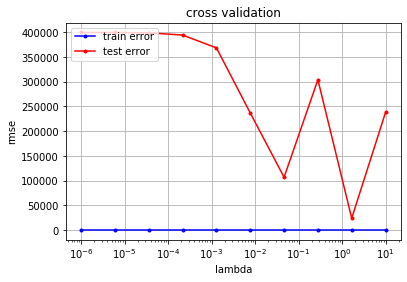

In [73]:
def cross_validation_demo():
    seed = 1
    degree = 7
    k_fold = 10
    lambdas = np.logspace(-6, 1, 10)
    
    # split data in k fold
    k_indices = build_k_indices(y_train, k_fold, seed)
    
    # define lists to store the loss of training data and test data
    rmse_tr_total = []
    rmse_te_total = []
    
    # cross validation:
    for lambda_ in lambdas:
        rmse_tr = []
        rmse_te = []
        for k in range (k_fold):
            print("lambda = ", lambda_, "k_fold = ", k)
            rmse_tr_tmp, rmse_te_tmp = cross_validation(y_train, tx_train, k_indices, k, lambda_, degree)
            rmse_tr.append(np.sqrt(rmse_tr_tmp))
            rmse_te.append(np.sqrt(rmse_te_tmp))
        rmse_tr_total.append(np.mean(rmse_tr))
        rmse_te_total.append(np.mean(rmse_te))
        
    cross_validation_visualization(lambdas, rmse_tr_total, rmse_te_total)

cross_validation_demo()

In [74]:
##### Ridge test
x_tr, x_te, y_tr, y_te = split_data(tx_train, y_train, 0.72)
px_tr = build_poly(x_tr, 7)
px_te = build_poly(x_te, 7)
loss, w = ridge_regression(y_tr, px_tr, 0.0002)

print("Loss ridge : \n", loss)
print("Weight ridge : \n", w)

Loss ridge : 
 325.1758083976528
Weight ridge : 
 [-2.83113814e-01  3.88289207e-01 -3.92986244e-01 -3.44771223e-01
  1.17709405e-01  8.02411312e-02 -3.81000126e-02 -9.94487711e-02
  1.83944582e-01 -5.03786693e-02 -1.35537824e-01 -1.90012376e-01
 -1.11034414e-01  8.53860515e-02  2.18152001e-01  2.09699383e-02
 -1.70684104e-02  2.38451019e-01  3.65273027e-03  7.43522661e-03
  5.46088499e-03 -2.59732532e-03 -2.29182371e-02  9.56376909e-02
 -8.10257612e-03 -1.48374365e-02  1.01321956e-01 -2.23551974e-03
  9.76539719e-03 -1.57421822e-01  1.09703165e-02 -4.65765768e-02
  6.59350194e-02 -2.42575008e-03  7.81911248e-02 -1.28795764e-02
 -1.23848298e-02 -2.11364352e-02 -3.21981546e-02  1.02621065e-01
  9.57267001e-03 -8.75961137e-02 -8.70448164e-02  9.09791055e-03
 -8.30882110e-03 -9.56094646e-02 -4.13120489e-02  1.06389388e-02
  3.42979933e-02 -8.45899446e-03 -7.09248093e-02 -3.03090373e-02
  1.06138194e-01  3.20917924e-02 -1.29096671e-02  5.47298704e-02
 -4.70129787e-02 -7.20539858e-02  9.3885

In [75]:
y_validation_tr = predict_labels(w, px_tr)
accuracy_tr = sum(y_validation_tr == y_tr)/len(y_tr)
print('Accuracy for Ridge (S train):', accuracy_tr)

y_validation_te = predict_labels(w, px_te)
accuracy_te = sum(y_validation_te == y_te)/len(y_te)
print('Accuracy for Ridge (S test):', accuracy_te)

Accuracy for Ridge (S train): 0.8004833333333333
Accuracy for Ridge (S test): 0.8005857142857142


***Logistic regression***

In [420]:
def find_best_param_logreg(y, x, gammas, lambdas, seed, max_iters, batch_size):
    best_losses = []
    best_gammas = []
    best_lambdas = []
    for gam in gammas:
        loss_gam_deg = []
        for lam in lambdas:
            print( ' Gam:', gam, ' Lam:', lam)
            initial_w = np.zeros(x_tr.shape[1], dtype=np.float64)
            loss, w = logistic_regression(y, x, initial_w, batch_size, max_iters, gam, lam)
            if np.isnan(loss):
                loss_gam_deg.append(10^999)
            else:
                loss_gam_deg.append(loss)
        
        index = np.nanargmin(loss_gam_deg)
        
        best_lam_for_gam = lambdas[index]
        best_loss_for_gam = loss_gam_deg[index]
        
        best_losses.append(best_loss_for_gam)
        best_lambdas.append(best_lam_for_gam)
        
    best_index = np.nanargmin(best_losses)
    best_gam = gammas[best_index]
    best_lam = best_lambdas[best_index]

    return best_gam, best_lam

lambdas=[0, 1e-3, 1e-6]
gammas=[5e-6, 5e-5, 5e-4, 5e-3]
best_gamma, best_lam = find_best_param_logreg(y_tr, x_tr, gammas, lambdas, 1, 24, 500)

 Gam: 5e-06  Lam: 0
 Gam: 5e-06  Lam: 0.001
 Gam: 5e-06  Lam: 1e-06
 Gam: 5e-05  Lam: 0
 Gam: 5e-05  Lam: 0.001
 Gam: 5e-05  Lam: 1e-06
 Gam: 0.0005  Lam: 0
 Gam: 0.0005  Lam: 0.001
 Gam: 0.0005  Lam: 1e-06
 Gam: 0.005  Lam: 0
 Gam: 0.005  Lam: 0.001
 Gam: 0.005  Lam: 1e-06


In [85]:
print(best_gamma, best_lam)
initial_w = np.zeros(x_tr.shape[1], dtype=np.float64)
loss_log, w_log = logistic_regression(y_tr, x_tr, initial_w, 1, 10, 5e-6, 0)

5e-05 0


In [86]:
y_validation_tr = predict_labels(w_log, x_tr)
accuracy_tr = sum(y_validation_tr == y_tr)/len(y_tr)
print('Accuracy for regularized logistic regression:', accuracy_tr)

y_validation_te = predict_labels(w_log, x_te)
accuracy_te = sum(y_validation_te == y_te)/len(y_te)
print('Accuracy for regularized logistic regression:', accuracy_te)

Accuracy for regularized logistic regression: 0.710416
Accuracy for regularized logistic regression: 0.710928


## Generate predictions and save ouput in csv format for submission:

In [9]:
DATA_TEST_PATH = '../data/test.csv' # TODO: download train data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [10]:
y_test, tx_test = preprocess_data(_, tX_test)

1.0
47.575
col n°1 first 6 values, before preprocess: [-999.     106.398  117.794  135.861   74.159   95.709]
col n°1 first 6 values, after preprocess:  [121.87172934 106.398      117.794      135.861       74.159
  95.709     ]
col n°2 first 6 values, after standardization:  [-2.25397884e-12 -2.95946335e-01 -7.79895413e-02  2.67554982e-01
 -9.12540672e-01 -5.00381239e-01] 



In [11]:
OUTPUT_PATH = 'output.csv' # TODO: fill in desired name of output file for submission

px_te = build_poly(tx_test, 7)
y_pred = predict_labels(w_LSp, px_te)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)